All changes w.r.t. t and S is the product of r and f

Three BS models in option pricing:
* the original BS model
* BSM model
* generallized BS model

multi-threading programming:


## Pandas Tutorial

In [5]:
import pandas as pd
import math

In [3]:
contacts2 = pd.Series([1235678,2568833,3338733,5903333],
                     index = ['alex','bill','tom','david'])
print("\n a series-->"+str(contacts2)+'\n')


 a series-->alex     1235678
bill     2568833
tom      3338733
david    5903333
dtype: int64



In [6]:
x = range(10)
a = pd.Series([math.sin(x[2]),5,math.pow(2,x[9]),11,29])
print(a)
a.mean()
a.std()
a.sum()
a.quantile(0.95)
a.cumsum()
a.sort()
print(a)

0      0.909297
1      5.000000
2    512.000000
3     11.000000
4     29.000000
dtype: float64
0      0.909297
1      5.000000
3     11.000000
4     29.000000
2    512.000000
dtype: float64


C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


## Get the data from Yahoo Finance

In [7]:
import numpy as np
import pandas as pd
import pandas.io.data as web

C:\Users\Miya\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [15]:
s_date = '6/1/2010'
e_date = '6/1/2015'
goog = web.DataReader('GOOG',data_source = 'google',start = s_date,end = e_date)

### Look at the data

In [12]:
g_idx = goog.index
print(g_idx)

DatetimeIndex(['2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04',
               '2010-06-07', '2010-06-08', '2010-06-09', '2010-06-10',
               '2010-06-11', '2010-06-14',
               ...
               '2015-05-18', '2015-05-19', '2015-05-20', '2015-05-21',
               '2015-05-22', '2015-05-26', '2015-05-27', '2015-05-28',
               '2015-05-29', '2015-06-01'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


In [20]:
g_head = goog.head()
g_tail = goog.tail()

In [21]:
g_head

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-01,239.97,245.28,239.82,240.94,NaN
2010-06-02,243.10,246.69,240.49,246.44,NaN
2010-06-03,247.31,253.75,247.10,252.55,NaN
2010-06-04,249.61,254.37,248.10,249.11,NaN
2010-06-07,249.28,250.20,241.33,242.52,NaN


In [22]:
print(g_tail[['Open','High']])

              Open    High
Date                      
2015-05-26  538.12  539.00
2015-05-27  532.80  540.55
2015-05-28  538.01  540.61
2015-05-29  537.37  538.63
2015-06-01  536.79  536.79


In [23]:
goog.loc['20100601']

Open      239.97
High      245.28
Low       239.82
Close     240.94
Volume       NaN
Name: 2010-06-01 00:00:00, dtype: float64

In [25]:
goog[1000:1010]

,Open,High,Low,Close,Volume
Date,,,,,
2014-05-21,532.90,539.18,531.91,538.94,1193389.0
2014-05-22,541.13,547.60,540.78,545.06,1611837.0
2014-05-23,547.26,553.64,543.70,552.70,1929632.0
2014-05-27,556.00,566.00,554.35,565.95,2100298.0
2014-05-28,564.57,567.84,561.00,561.68,1647717.0
2014-05-29,563.35,564.00,558.71,560.08,1350657.0
2014-05-30,560.80,561.35,555.91,559.89,1766794.0
2014-06-02,560.70,560.90,545.73,553.93,1434989.0
2014-06-03,550.99,552.34,542.55,544.94,1861921.0


### Save it to the file

In [26]:
filename = 'goog_stock_data.csv'
goog.to_csv(filename,sheet_name = 'sheet1', index = False)

### Check if the file exists

In [28]:
## check if the file exists
import os.path
if (os.path.isfile(filename) == True):
    print("\n"+filename+"is saved!\n")


goog_stock_data.csvis saved!



To know the risk of a stock

An important measurement is volatility

** We need to calculate the sequence u: log of the ratio of two neighbour close price**

In [31]:
S_i = goog['Close']
S_i_minus_1 = goog['Close'].shift(1)
S_i[0:10]

Date
2010-06-01    240.94
2010-06-02    246.44
2010-06-03    252.55
2010-06-04    249.11
2010-06-07    242.52
2010-06-08    242.15
2010-06-09    236.77
2010-06-10    243.26
2010-06-11    244.01
2010-06-14    241.35
Name: Close, dtype: float64

** Create a u sequence**

In [32]:
goog['U_sequence'] = np.log(S_i/S_i_minus_1)

In [33]:
U_sequence = goog['U_sequence']

** compute s**

In [34]:
s = pd.rolling_std(goog['U_sequence'],window = 252)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  if __name__ == '__main__':


In [35]:
s = goog['U_sequence'].rolling(window = 252)

In [36]:
goog['Volatility'] = pd.rolling_std(U_sequence, window = 252)* np.sqrt(252)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  if __name__ == '__main__':


In [41]:
 %matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000EF33C29F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000EF35424390>], dtype=object)

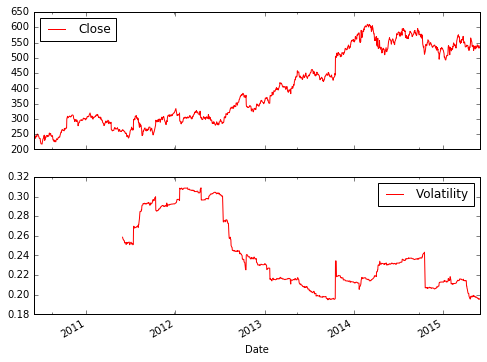

In [42]:
goog[['Close','Volatility']].plot(subplots = True,color = 'red',figsize=(8,6))

## What about Apple?

In [53]:
s_date = '6/1/2008'
e_date = '9/1/2016'
apple = web.DataReader('AAPL',data_source = 'google',start = s_date,end = e_date)

In [54]:
S_i = apple['Close']
S_i_minus_1 = apple['Close'].shift(1)
apple['U_sequence'] = np.log(S_i/S_i_minus_1)
U_sequence = apple['U_sequence']
apple['Volatility'] = pd.rolling_std(U_sequence, window = 252)* np.sqrt(252)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000EF355A0400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000EF3561F080>], dtype=object)

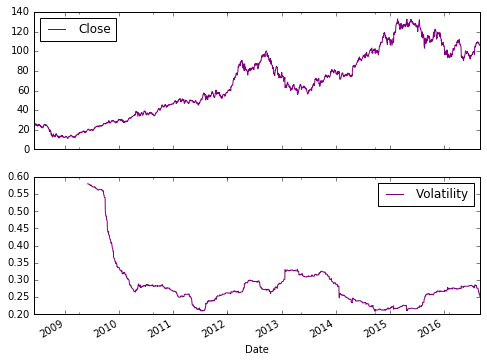

In [56]:
apple[['Close','Volatility']].plot(subplots = True,color = 'purple',figsize=(8,6))